In [2]:
import h2o
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import h2o.grid
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator

In [3]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM 18.9 (build 11.0.11+9-LTS-194, mixed mode)
  Starting server from C:\Users\Gerd\venvs\kaggle\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Gerd\AppData\Local\Temp\tmplxv9s1qn
  JVM stdout: C:\Users\Gerd\AppData\Local\Temp\tmplxv9s1qn\h2o_Gerd_started_from_python.out
  JVM stderr: C:\Users\Gerd\AppData\Local\Temp\tmplxv9s1qn\h2o_Gerd_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Europe/Berlin
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.3
H2O_cluster_version_age:,1 month and 5 days
H2O_cluster_name:,H2O_from_python_Gerd_znnvbe
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.975 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"accepting new members, healthy"


In [17]:
data = h2o.import_file('./data/prepped-train.csv')
prediction_frame = h2o.import_file('./data/test.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [18]:
train, valid, test = data.split_frame([0.8, 0.1], seed=69)

In [19]:
train.summary()

,C1,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,target
type,int,int,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,enum
mins,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
mean,75674.2025482651,99970.07361562982,0.3321064560358285,0.3493405377462991,0.5064412435466459,0.5015942824168038,0.2755960944073711,0.4858573367084233,0.3118098525749959,0.2644117176899833,0.5620587563381156,0.4714844639410832,0.5513414244774804,0.30813837152280443,0.8485794382130644,0.3738670741123233,0.535159306409957,0.2590726087534001,0.5076413848356023,0.1415580821155235,0.637672177873336,1.3010520777476369,0.6458990124372386,0.33508212681140714,0.28101077127802104,0.22384956369070866,0.27535866003047604,0.6857483355876972,0.38558152550259656,0.2959123345789623,0.47799593245076755,0.475500962114366,0.31755775196040087,0.6348417266525801,0.3023936717704392,0.5895360594773781,0.3109686499781741,0.4133664950104039,0.24034841183168254,0.55157864960316,0.3142323339307921,0.8479621606501081,0.38344351324516773,0.3344859863180213,0.2955067076297103,1.0753588751312124,0.3808013604243571,0.2794749432357727,0.42443449956973045,0.20528134322903874,0.44725701369087206,0.14995933246036938,0.7200598376885368,0.5276102204282781,0.2806792403828484,0.5188161475434107,1.2996867798379508,0.4531649789153177,0.719871398537247,0.255416342260259,0.3760581545674413,0.3874660989472488,0.4461375880531724,0.38840279833159136,0.6380609945173131,0.30763219671246733,0.2769520921204211,0.4744052568233573,0.1778169774374149,0.4121340420241346,0.3194458748834283,0.5619640877694495,0.3892444821937348,0.34540981998281906,0.4114632142800646,0.4782814068075544,0.182418107403716,
maxs,151252.0,199999.0,4.127134385045092,3.951243718581427,4.174387269895637,4.2626798770413155,3.6635616461296463,4.343805421853684,3.784189633918261,3.4339872044851463,3.6635616461296463,4.290459441148391,3.5263605246161616,3.8501476017100584,3.6375861597263857,3.784189633918261,3.49650756146648,4.804021044733257,3.332204510175204,2.70805020110221,3.1354942159291497,5.575949103146316,3.4339872044851463,3.5263605246161616,4.820281565605037,3.1354942159291497,4.248495242049359,5.0106352940962555,3.218875824868201,4.442651256490317,4.663439094112067,4.442651256490317,3.1354942159291497,3.688879454113936,4.3694478524670215,3.737669618283368,3.610917912644224,3.737669618283368,3.7612001156935624,3.5553480614894135,3.737669618283368,3.912023005428146,4.406719247264253,4.30406509320417,3.9889840465642745,4.1588830833596715,3.332204510175204,3.4339872044851463,4.770684624465665,4.584967478670572,3.713572066704308,3.6635616461296463,4.04305126783455,4.30406509320417,3.6635616461296

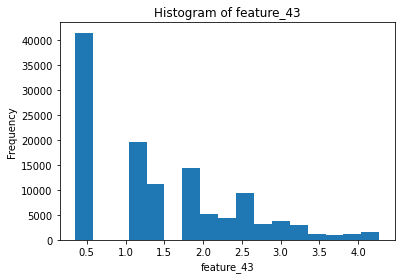

In [20]:
train["feature_43"].hist()

In [21]:
features = train.columns
features.remove("id")
features.remove("C1")
features.remove("target")

target = "target"

In [22]:
#features

['feature_0',
 'feature_1',
 'feature_2',
 'feature_3',
 'feature_4',
 'feature_5',
 'feature_6',
 'feature_7',
 'feature_8',
 'feature_9',
 'feature_10',
 'feature_11',
 'feature_12',
 'feature_13',
 'feature_14',
 'feature_15',
 'feature_16',
 'feature_17',
 'feature_18',
 'feature_19',
 'feature_20',
 'feature_21',
 'feature_22',
 'feature_23',
 'feature_24',
 'feature_25',
 'feature_26',
 'feature_27',
 'feature_28',
 'feature_29',
 'feature_30',
 'feature_31',
 'feature_32',
 'feature_33',
 'feature_34',
 'feature_35',
 'feature_36',
 'feature_37',
 'feature_38',
 'feature_39',
 'feature_40',
 'feature_41',
 'feature_42',
 'feature_43',
 'feature_44',
 'feature_45',
 'feature_46',
 'feature_47',
 'feature_48',
 'feature_49',
 'feature_50',
 'feature_51',
 'feature_52',
 'feature_53',
 'feature_54',
 'feature_55',
 'feature_56',
 'feature_57',
 'feature_58',
 'feature_59',
 'feature_60',
 'feature_61',
 'feature_62',
 'feature_63',
 'feature_64',
 'feature_65',
 'feature_66',
 'fea

In [17]:
#
# APPROACH 1: grid search deep learning model
#

In [15]:
grid = h2o.grid.H2OGridSearch(H2ODeepLearningEstimator(epochs=30, hidden = [400, 400], activation = "RectifierWithDropout", distribution="multinomial"),
                                search_criteria={"strategy":"RandomDiscrete", "max_models":5},
                                hyper_params={"seed":77, "l1":[0, 1e-6, 3e-6, 1e-5], "l2":[0, 1e-6, 3e-6, 1e-5],
                                             "input_dropout_ratio":[0, 0.1, 0.2, 0.3], #drops random n percent of input neurons
                                             "hidden_dropout_ratios":[[0,0], [0.2, 0.2], [0.4, 0.4], [0.6, 0.6]] #drops random n percent of hidden neurons
                                             },
                                grid_id="deeplearning-grid"
               )

grid.train(x = features, y = target, training_frame = train, validation_frame = valid)

deeplearning Grid Build progress: |███████████████████████████████████████| 100%


In [16]:
grid.logloss()

{'deeplearning-grid_model_3': 2.7207159733190416,
 'deeplearning-grid_model_2': 4.460437545371843,
 'deeplearning-grid_model_5': 5.048817261711835,
 'deeplearning-grid_model_1': 5.163000847775469,
 'deeplearning-grid_model_4': 7.305474364487933}

In [ ]:
#
# APPROACH 2: grid search generalized linear model
#

In [9]:
grid2 = h2o.grid.H2OGridSearch(
    H2OGeneralizedLinearEstimator(
    family = "multinomial",
    lambda_search = True,
    balance_classes = True,
    ),
    hyper_params = {
        "alpha":[x * 0.01 for x in range (0, 100)],
    },
    search_criteria = {
        "strategy":"RandomDiscrete",
        "max_models":8,
        "max_runtime_secs":60
    },
    grid_id="glm-grid",
)
grid2.train(x = features, y = target, training_frame = train, validation_frame = valid)

glm Grid Build progress: |████████████████████████████████████████████████| 100%


In [ ]:
#
# APPROACH 3: gbm model
#

In [26]:
gbm = H2OGradientBoostingEstimator(model_id = 'gbm-model', stopping_metric='logloss', score_tree_interval=1, #balance_classes= True,
                                                  stopping_tolerance=0.001 ,stopping_rounds=5, ntrees=500, nfolds=8, max_depth=5)

gbm.train(x = features, y = target, training_frame = train, validation_frame = valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [27]:
#
# load existing gbm:
#

#gbm = h2o.load_model('./models/gbm-model')

In [28]:
gbm.model_performance(test)


ModelMetricsMultinomial: gbm
** Reported on test data. **

MSE: 0.6108776593828907
RMSE: 0.7815866294806294
LogLoss: 1.754164592076222
Mean Per-Class Error: 0.8373798575654634
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9,Error,Rate
0,0.0,249.0,0.0,0.0,0.0,0.0,1.0,662.0,4.0,1.000000,916 / 916
1,0.0,1388.0,1.0,0.0,0.0,1.0,0.0,1084.0,29.0,0.445465,1Â 115 / 2Â 503
2,0.0,667.0,0.0,0.0,0.0,0.0,0.0,802.0,9.0,1.000000,1Â 478 / 1Â 478
3,0.0,133.0,1.0,0.0,0.0,0.0,0.0,351.0,6.0,1.000000,491 / 491
4,0.0,73.0,0.0,0.0,1.0,0.0,0.0,243.0,1.0,0.996855,317 / 318
5,0.0,40.0,0.0,0.0,0.0,1.0,0.0,290.0,3.0,0.997006,333 / 334
6,0.0,212.0,0.0,0.0,0.0,0.0,0.0,1288.0,10.0,1.000000,1Â 510 / 1Â 510
7,0.0,527.0,1.0,1.0,0.0,0.0,4.0,4565.0,23.0,0.108573,556 / 5Â 121
8,0.0,690.0,0.0,0.0,0.0,0.0,1.0,1806.0,29.0,0.988519,2Â 497 / 2Â 526
9,0.0,3979.0,3.0,1.0,1.0,2.0,6.0,11091.0,114.0,0.606238,9Â 213 / 15Â 197



Top-9 Hit Ratios: 


,k,hit_ratio
0,1,0.393762
1,2,0.563532
2,3,0.710732
3,4,0.804501
4,5,0.872475
5,6,0.926959
6,7,0.960848
7,8,0.984668
8,9,1.000000


In [29]:
gbm.predict(test)

gbm prediction progress: |████████████████████████████████████████████████| 100%


predict,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
Class_2,0.0510709,0.488602,0.15875,0.0304733,0.0177444,0.00940902,0.0361424,0.0630967,0.144711
Class_8,0.0552989,0.0677257,0.0469943,0.0278092,0.0212837,0.0248669,0.119494,0.463519,0.173008
Class_8,0.0523349,0.0586912,0.0681209,0.0290249,0.0227249,0.0273823,0.106212,0.459667,0.175841
Class_2,0.0552732,0.468128,0.164612,0.0293276,0.0175209,0.0128215,0.0358099,0.0715766,0.14493
Class_8,0.064129,0.116943,0.0998888,0.0312999,0.0231543,0.0289834,0.102678,0.324947,0.207977
Class_8,0.048883,0.0435688,0.0365024,0.0235706,0.0232741,0.0552586,0.158299,0.472957,0.137686
Class_8,0.0524378,0.0709453,0.0486669,0.028847,0.0218536,0.0183274,0.111362,0.51669,0.130869
Class_8,0.0666751,0.0905997,0.0816927,0.0332513,0.0244312,0.0371972,0.121295,0.358853,0.186006
Class_8,0.0544076,0.043942,0.0462999,0.0345691,0.0495287,0.0143668,0.14486,0.415925,0.196101
Class_8,0.0569,0.112713,0.0865554,0.0327302,0.0213935,0.0174073,0.100639,0.40576,0.165901


In [30]:
output = gbm.predict(prediction_frame)

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [ ]:
'''
FINDINGS:
    Deep Learning:
    - feature 20 seems to be very important
    
    GLM:
    - feature 12 and 43 seem to be very important
    
'''

In [15]:
#saving model
gbm_save = h2o.get_model(gbm.model_id)
h2o.save_model(gbm_save, './models/gbm-0.1')


'C:\\Users\\Gerd\\Desktop\\dev\\kaggle\\tbs-jun\\models\\gbm-0.1\\gbm-model'

In [31]:
output = output.as_data_frame()
ids = prediction_frame.as_data_frame()["id"]
result = pd.concat([ids, output], axis=1)
result = result.drop(["predict"], axis=1)
result.to_csv('./data/prediction-output.csv', index=False)

In [3]:
h2o.cluster().shutdown()

H2O session _sid_84a6 closed.
